In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [33]:
data = pd.read_csv(r'C:\Users\admin\Desktop\after_preprocess_data.csv', encoding = 'iso-8859-1')
data.sample(3)

,number_of_rooms,floor_on,total_floors,bedroom,pincode,balkon,terrasse,garten,Gaste-WC,Aufzug,wohung,construction_year,living_area_m2,transform_price
8137,4.0,0,0,3,10999,1,1,0,0,1,1,1890,4.795791,8.779711
9282,8.0,0,2,6,14959,0,0,0,1,0,0,0,5.575949,7.115613
3382,5.0,0,3,3,15711,0,1,1,1,0,0,2020,4.846389,8.020225


## Let's divide dataset into independent and dependent(target)

In [3]:
X = data.iloc[:, :-1]
y = data['transform_price']

## Well, I've seen most of them taking test_size nearly 20% to 30%. 
But actually shouldn't, because our goal is to train our model well. For generalization if we can hold-out 2% to 3% is enough.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state = 0)

In [12]:
X_train.shape, X_test.shape

((12424, 13), (319, 13))

## Let's train our model:
### 1. RidgeRegression() with regularization parameter of 20.0

In [13]:
from sklearn.linear_model import Ridge

In [14]:
linridge = Ridge(alpha = 20.0).fit(X_train, y_train)
print('Ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('Ridge regression linear model coeff: {}'.format(linridge.coef_))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test, y_test)))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train, y_train)))

Ridge regression linear model intercept: 8.799438513699782
Ridge regression linear model coeff: [-2.06661811e-02  5.33911211e-03  5.87479988e-03  5.85962148e-04
 -1.67284824e-05 -3.16717359e-02  1.22591063e-01  7.31840522e-02
  6.06143212e-02  1.47644943e-01  1.45186081e-01  6.93449990e-05
 -1.08435197e-01]
R-squared score (test): 0.449
R-squared score (training): 0.424


#### As you can see above, test accuracy is just "45%"

## ohh, let's try it out with sophisticated models
### 2. RandomForestRegressor() along with it's hyperparameters

In [19]:
for i in range(1200, 3000, 100):
    clf = RandomForestRegressor(n_estimators= i, max_features= 'sqrt', random_state = 0).fit(X_train, y_train)
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)
    print('R-squared score (training) for {} estimators:'.format(i), r2_score(y_train, y_hat_train)) 
    print('R-squared score (test) for {} estimators:'.format(i), r2_score(y_test, y_hat_test))
    

R-squared score (training) for 1200 estimators: 0.9628701950603202
R-squared score (test) for 1200 estimators: 0.8226172978641135
R-squared score (training) for 1300 estimators: 0.962802236303499
R-squared score (test) for 1300 estimators: 0.8226452772138556
R-squared score (training) for 1400 estimators: 0.9628761771762897
R-squared score (test) for 1400 estimators: 0.8228217209004293
R-squared score (training) for 1500 estimators: 0.9629148596856547
R-squared score (test) for 1500 estimators: 0.8223397336222069
R-squared score (training) for 1600 estimators: 0.9630007413292595
R-squared score (test) for 1600 estimators: 0.8220937236147328
R-squared score (training) for 1700 estimators: 0.9630157439546663
R-squared score (test) for 1700 estimators: 0.8220093895191493
R-squared score (training) for 1800 estimators: 0.9629545641039581
R-squared score (test) for 1800 estimators: 0.8220352204436876
R-squared score (training) for 1900 estimators: 0.9630288529257889
R-squared score (test) f

#### Great, after tuning with n_estimators hyperparameter at 1400 we get highest value "82.28%".

In [20]:
clf = RandomForestRegressor(n_estimators= 1400, max_features= 'sqrt', random_state = 0).fit(X_train, y_train)
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

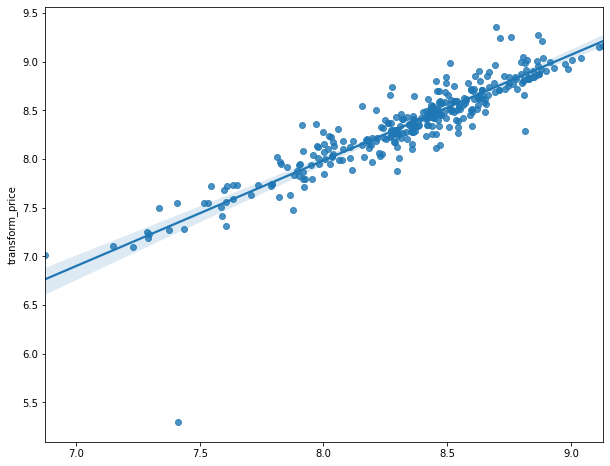

In [41]:
fig, axes = plt.subplots(figsize = (10, 8))
sns.regplot(y_hat_test, y_test, ax = axes)

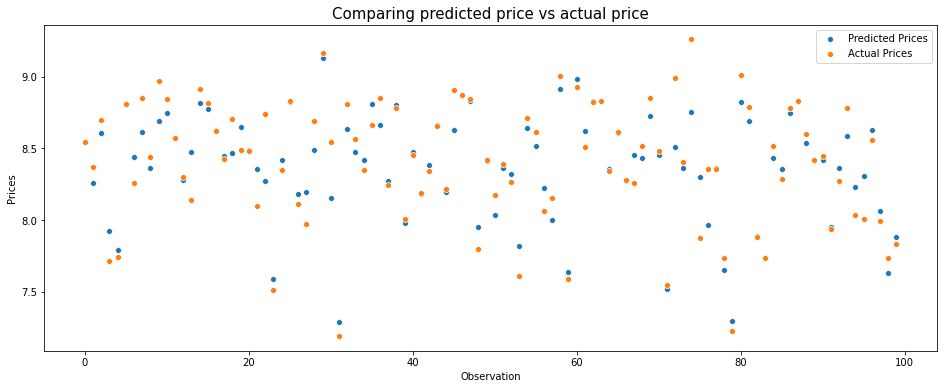

(<matplotlib.legend.Legend at 0x1e4dd3eee48>, None)

In [23]:
plt.figure(figsize=(16,6))
sns.scatterplot(range(len(y_hat_test[:100])), y_hat_test[:100], label='Predicted Prices')
sns.scatterplot(range(len(y_hat_test[:100])), y_test[:100], label='Actual Prices')
plt.title('Comparing predicted price vs actual price', fontdict={'fontsize': 15}), plt.xlabel('Observation'), plt.ylabel('Prices')
plt.legend(), plt.show()

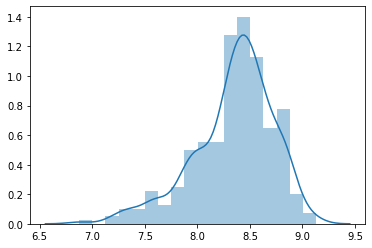

In [24]:
sns.distplot(y_hat_test)

## 3. GradientBoostingRegressor(), 
#### usually max_depth is kept 3 to 5, I went through 5 and learning_rate with 0.1

In [27]:
from sklearn import ensemble
for i in range(500, 2500, 200):
    clf_grad = ensemble.GradientBoostingRegressor(n_estimators = i, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls').fit(X_train, y_train)
    y_hat_train_grad = clf_grad.predict(X_train)
    y_hat_test_grad = clf_grad.predict(X_test)
    print('R-squared score (training) for {} estimators:'.format(i), r2_score(y_train, y_hat_train_grad)) 
    print('R-squared score (test) for {} estimators:'.format(i), r2_score(y_test, y_hat_test_grad))

R-squared score (training) for 500 estimators: 0.9033680241553609
R-squared score (test) for 500 estimators: 0.815157099223988
R-squared score (training) for 700 estimators: 0.9262307524763855
R-squared score (test) for 700 estimators: 0.8177268759162056
R-squared score (training) for 900 estimators: 0.9406455873076718
R-squared score (test) for 900 estimators: 0.8259970566191818
R-squared score (training) for 1100 estimators: 0.9510892612513765
R-squared score (test) for 1100 estimators: 0.8255844516335633
R-squared score (training) for 1300 estimators: 0.9591839044501477
R-squared score (test) for 1300 estimators: 0.8289709816462105
R-squared score (training) for 1500 estimators: 0.9652317723945201
R-squared score (test) for 1500 estimators: 0.8266397574130137
R-squared score (training) for 1700 estimators: 0.9701931568705451
R-squared score (test) for 1700 estimators: 0.8271541583549228
R-squared score (training) for 1900 estimators: 0.9738976256441577
R-squared score (test) for 190

#### Super!!!, At 2100 estimators, we get accuracy about "82.98%". This is performing better than randomforest.

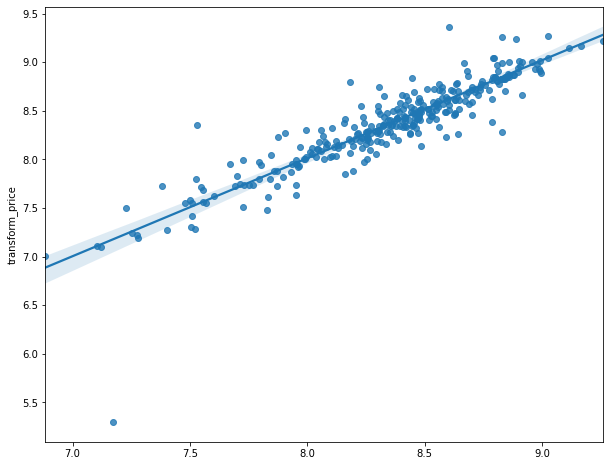

In [40]:
fig, axes = plt.subplots(figsize = (10, 8))
sns.regplot(y_hat_test_grad, y_test, ax = axes)

## 3. KNeighborsRegressor()

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
KNN_model = KNeighborsRegressor(n_neighbors= 1).fit(X_train, y_train)
y_hat_train_knn = KNN_model.predict(X_train)
y_hat_test_knn = KNN_model.predict(X_test)
print('R-squared score (training) for {} estimators:'.format(i), r2_score(y_train, y_hat_train_knn)) 
print('R-squared score (test) for {} estimators:'.format(i), r2_score(y_test, y_hat_test_knn))

R-squared score (training) for 19 estimators: 0.9923276978947304
R-squared score (test) for 19 estimators: 0.7542511358231722


#### First , I went with default parameters it was showing 73%, after tuning a little I got "75.45%" at n_neighbors = 1.

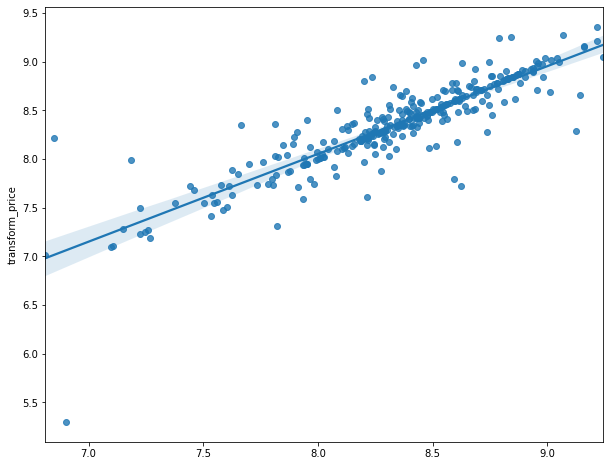

In [42]:
fig, axes = plt.subplots(figsize = (10, 8))
sns.regplot(y_hat_test_knn, y_test, ax = axes)

In [1]:
g = 'hello world'

In [3]:
g[0] = 'j'

TypeError: 'str' object does not support item assignment

In [5]:
import sys

In [7]:
sys.setrecursionlimit(5000)

In [8]:
sys.getrecursionlimit()

5000

In [9]:
aa = {'a':1, 'b':2}

In [13]:
bb=()
for i, j in aa.items():
    bb.append(i)
    
bb

AttributeError: 'tuple' object has no attribute 'append'

In [16]:
aa.items()

dict_items([('a', 1), ('b', 2)])

In [23]:
g = [1, 2, 2000]
h = [1, 3, 4]


In [24]:
g<h

True